<a href="https://colab.research.google.com/github/hamednasr/TensorFlow-Projects/blob/main/potato_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Model to Detect Potato Diseases
### according to 1000 images of "Early blight" and 1000 images of "late blight" and 152 images of "healthy" potatoes, a deep learning model is created and trained then deployed.

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Create Image Dataset:

In [108]:
potato_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/Computer Vision/potato disease/data',
                                                    labels='inferred',
                                                    label_mode='int',
                                                    batch_size=32,
                                                    image_size=(256, 256),
                                                    shuffle=True)

Found 2152 files belonging to 3 classes.


In [109]:
classes = potato_ds.class_names
classes

['Early_blight', 'Late_blight', 'healthy']

In [110]:
len(potato_ds)

68

In [114]:
for images, labels in potato_ds.take(1):
  print(images.shape)
  print(labels)

(32, 256, 256, 3)
tf.Tensor([1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 2 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1], shape=(32,), dtype=int32)


# Visualizing Images:

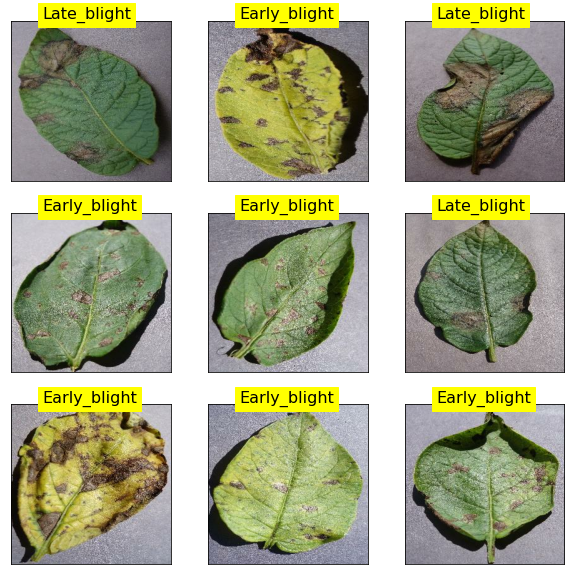

In [115]:
fig , axs = plt.subplots(3,3,figsize=(10,10))

for  i, ax in enumerate(axs.flatten()):
  ax.imshow(images[i]/255)
  itemname = classes[labels[i]]
  ax.text(50, -3, itemname, fontsize=16 ,backgroundcolor='yellow')
  ax.set_xticks([])
  ax.set_yticks([]);

# Train, Val, Test Split:

In [119]:
def train_val_test_split(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [120]:
train_ds, val_ds, test_ds = train_val_test_split(potato_ds)

In [121]:
train_ds = train_ds.shuffle(200).prefetch(tf.data.AUTOTUNE).cache()
val_ds = val_ds.shuffle(200).prefetch(tf.data.AUTOTUNE).cache()
test_ds = test_ds.shuffle(200).prefetch(tf.data.AUTOTUNE).cache()

In [122]:
train_ds

<CacheDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Data Augmentation: